In [1]:
#importing important libraries
import pandas as pd
import seaborn as sns

In [2]:
#Loading the train dataset
df = pd.read_csv('test_mSzZ8RL.csv')

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [4]:
df.shape

(105312, 10)

In [5]:
#Let's check the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [6]:
# Let's find out the some important stastical parameters of continuos data
df.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [7]:
#let's just check is there any null value. We can check from info, but i'm trying to show seperately.
df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [8]:
#Let's see how much this Na values in percentage
df['Credit_Product'].isna().sum()/len(df)

0.11890382862351868

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

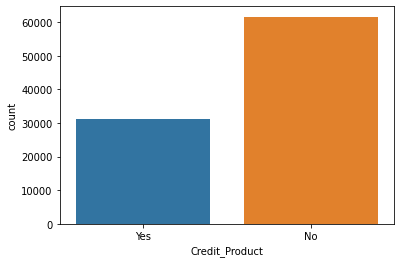

In [9]:
#Now we have 2 options, either we can drop thses Na values or fill it. We will fill these values by mode.
sns.countplot(df['Credit_Product'])

In [10]:
# from above plot, we can see 'No' is the mode. So we are going to use it.
df['Credit_Product'].fillna(df['Credit_Product'].mode()[0], inplace=True)

In [11]:
df['Credit_Product'].isna().sum()/len(df)

0.0

In [12]:
# As the first column is ID, which will not help us in the further process, So we'll going to drop it.
df = df.drop('ID', axis=1)

In [13]:
# Let's check our dataset again
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,No,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


## Feature Engineering

In [14]:
#Let's create dummy for categorical values
dummy1 = pd.get_dummies(df['Gender'], drop_first=True)
dummy2 = pd.get_dummies(df['Occupation'], drop_first=False)
dummy3 = pd.get_dummies(df['Channel_Code'], drop_first=False)
dummy4 = pd.get_dummies(df['Credit_Product'], drop_first=False)

In [15]:
#Renaming the column to prevent creating duplcate
dummy4 = dummy4.rename(columns={'Yes':'Cr_yes', 'No':'Cr_No'})

In [16]:
dummy5 = pd.get_dummies(df['Is_Active'], drop_first=False)

In [17]:
#Now drop the original coulmns and also the irrelevant column
df = df.drop(['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'], axis=1)

In [18]:
#Now Concate all these dummies with dataframe
New_df = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5], axis=1)

In [19]:
New_df.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Male', 'Entrepreneur',
       'Other', 'Salaried', 'Self_Employed', 'X1', 'X2', 'X3', 'X4', 'Cr_No',
       'Cr_yes', 'No', 'Yes'],
      dtype='object')

In [20]:
#Set the column in order
New_df = New_df[['Age', 'Vintage', 'Avg_Account_Balance', 'Male',
       'Entrepreneur', 'Other', 'Salaried', 'Self_Employed', 'X1', 'X2', 'X3',
       'X4', 'Cr_No', 'Cr_yes', 'No', 'Yes']]

In [21]:
New_df.head()

,Age,Vintage,Avg_Account_Balance,Male,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4,Cr_No,Cr_yes,No,Yes
0,29,25,742366,1,0,1,0,0,1,0,0,0,0,1,1,0
1,43,49,925537,1,0,1,0,0,0,1,0,0,1,0,1,0
2,31,14,215949,1,0,0,1,0,1,0,0,0,1,0,1,0
3,29,33,868070,1,0,1,0,0,1,0,0,0,1,0,1,0
4,29,19,657087,0,0,1,0,0,1,0,0,0,1,0,1,0


## Prediction

In [22]:
import pickle
model = pickle.load(open('Credit Card Lead Prediction_xgb.sav', 'rb'))

In [23]:
prediction = model.predict(New_df)

In [24]:
result = pd.DataFrame(prediction,columns=['Is_Lead'])

In [25]:
df1 = pd.read_csv('test_mSzZ8RL.csv')

In [26]:
df_subm = pd.concat([df1['ID'],result], axis=1) # creating new dataframe using ID and prediction as required

In [27]:
df_subm

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,1
105310,2PW4SFCA,1


In [28]:
df_subm.to_csv('Credit_Card_Lead_Prediction_final_submission1.csv', index=False) #storing in a csv file